In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', delimiter=';', parse_dates=["Дата создания"], dayfirst=True, low_memory=False)

In [8]:
# # Remove rows related to "ДОП. РАБОТА" and "Снятие фаски со всех сторон"

df = df[~df["Товар"].isin(["ДОП. РАБОТА", "Снятие фаски со всех сторон"])]

In [10]:
df

ID Воронка Повторная сделка Повторное обращение   Стадия сделки  \
0     11180   Общая                N                   N  Сделка успешна   
1     11118   Общая                N                   N  Сделка успешна   
2     11056   Общая                N                   N  Сделка успешна   
3     11056   Общая                N                   N  Сделка успешна   
4     11056   Общая                N                   N  Сделка успешна   
...     ...     ...              ...                 ...             ...   
2291   5630   Общая                N                   N  Сделка успешна   
2292   5630   Общая                N                   N  Сделка успешна   
2293   5630   Общая                N                   N  Сделка успешна   
2294   5630   Общая                N                   N  Сделка успешна   
2295   5630   Общая                N                   N  Сделка успешна   

      Наблюдатели  Вероятность  Статус оплаты  Статус доставки  \
0             NaN          NaN            NaN              NaN   
1             NaN          NaN            NaN              NaN   
2             NaN          NaN            NaN              NaN   
3             NaN          NaN            NaN              NaN   
4             NaN          NaN            NaN              NaN   
...           ...          ...            ...              ...   
2291          NaN          NaN            NaN              NaN   
2292          NaN          NaN            NaN              NaN   
2293          NaN          NaN            NaN              NaN   
2294          NaN          NaN            NaN              NaN   
2295          NaN          NaN            NaN              NaN   

       Ответственный  ...  Компания: Комментарии Instagram  \
0     Дмитрий Тришин  ...                              NaN   
1      Инна Хасанова  ...                              NaN   
2      Инна Хасанова  ...                              NaN   
3      Инна Хасанова  ...                              NaN   
4      Инна Хасанова  ...                              NaN   
...              ...  ...                              ...   
2291   Инна Хасанова  ...                              NaN   
2292   Инна Хасанова  ...                              NaN   
2293   Инна Хасанова  ...                              NaN   
2294   Инна Хасанова  ...                              NaN   
2295   Инна Хасанова  ...                              NaN   

     Компания: Контакт Битрикс24.Network Компания: Онлайн-чат  \
0                                    NaN                  NaN   
1                                    NaN                  NaN   
2                                    NaN                  NaN   
3                                    NaN                  NaN   
4                                    NaN                  NaN   
...                                  ...                  ...   
2291                                 NaN                  NaN   
2292                                 NaN                  NaN   
2293                                 NaN                  NaN   
2294                                 NaN                  NaN   
2295                                 NaN                  NaN   

     Компания: Контакт Открытая линия Компания: Контакт ICQ  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
2291                              NaN                   NaN   
2292                              NaN                   NaN   
2293                              NaN                   NaN   
2294                              NaN                   NaN   
2295                              NaN                   NaN   

      Компания: Конт

In [11]:
def calculate_deal_amount(row):
    return row["Цена"] * row["Количество"]

In [12]:
df["Сумма сделки"] = df.apply(calculate_deal_amount, axis=1)

In [13]:
# Приведение городов к нижнему регистру и удаление лишних пробелов
df["Город"] = df["Город"].str.lower().str.strip()

In [14]:
def group_products_and_metrics(group_df):
    total_deal_amount = group_df["Сумма сделки"].sum()
    total_failed_deals = len(group_df[group_df["Стадия сделки"] == "Сделка не удалась"])
    avg_price = group_df["Цена"].mean()
    avg_quantity = group_df["Количество"].mean()
    return pd.Series({
        "Общая сумма сделок": total_deal_amount,
        "Количество сорванных сделок": total_failed_deals,
        "Средняя цена": avg_price,
        "Среднее количество": avg_quantity
    })

In [15]:
deal_metrics_df = df.groupby(["Товар"]).apply(group_products_and_metrics)
deal_metrics_df.reset_index(inplace=True)

In [16]:
deal_metrics_df.to_excel("deal_metrics.xlsx", index=False)

In [17]:
def group_by_city_and_time(group_df):
    group_df["Год и месяц"] = group_df["Дата создания"].dt.to_period("M")
    total_deal_amount = group_df["Сумма сделки"].sum()
    total_failed_deals = len(group_df[group_df["Стадия сделки"] == "Сделка не удалась"])
    avg_price = group_df["Цена"].mean()
    avg_quantity = group_df["Количество"].mean()
    manager_share = group_df["Ответственный"].value_counts(normalize=True)
    return pd.Series({
        "Общая сумма сделок": total_deal_amount,
        "Количество сорванных сделок": total_failed_deals,
        "Средняя цена": avg_price,
        "Среднее количество": avg_quantity,
        "Доля менеджеров": manager_share
    })

In [18]:
city_time_metrics_df = df.groupby(["Город"]).apply(group_by_city_and_time)
city_time_metrics_df.reset_index(inplace=True)


In [19]:
city_time_metrics_df.to_excel("city_time_metrics.xlsx", index=False)

In [20]:
plt.figure(figsize=(80, 50))
sns.barplot(x="Товар", y="Общая сумма сделок", data=deal_metrics_df)
plt.xlabel("Товар")
plt.ylabel("Общая сумма сделок")
plt.title("Общая сумма сделок по товарам")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("deal_metrics_plot.png")
plt.show()

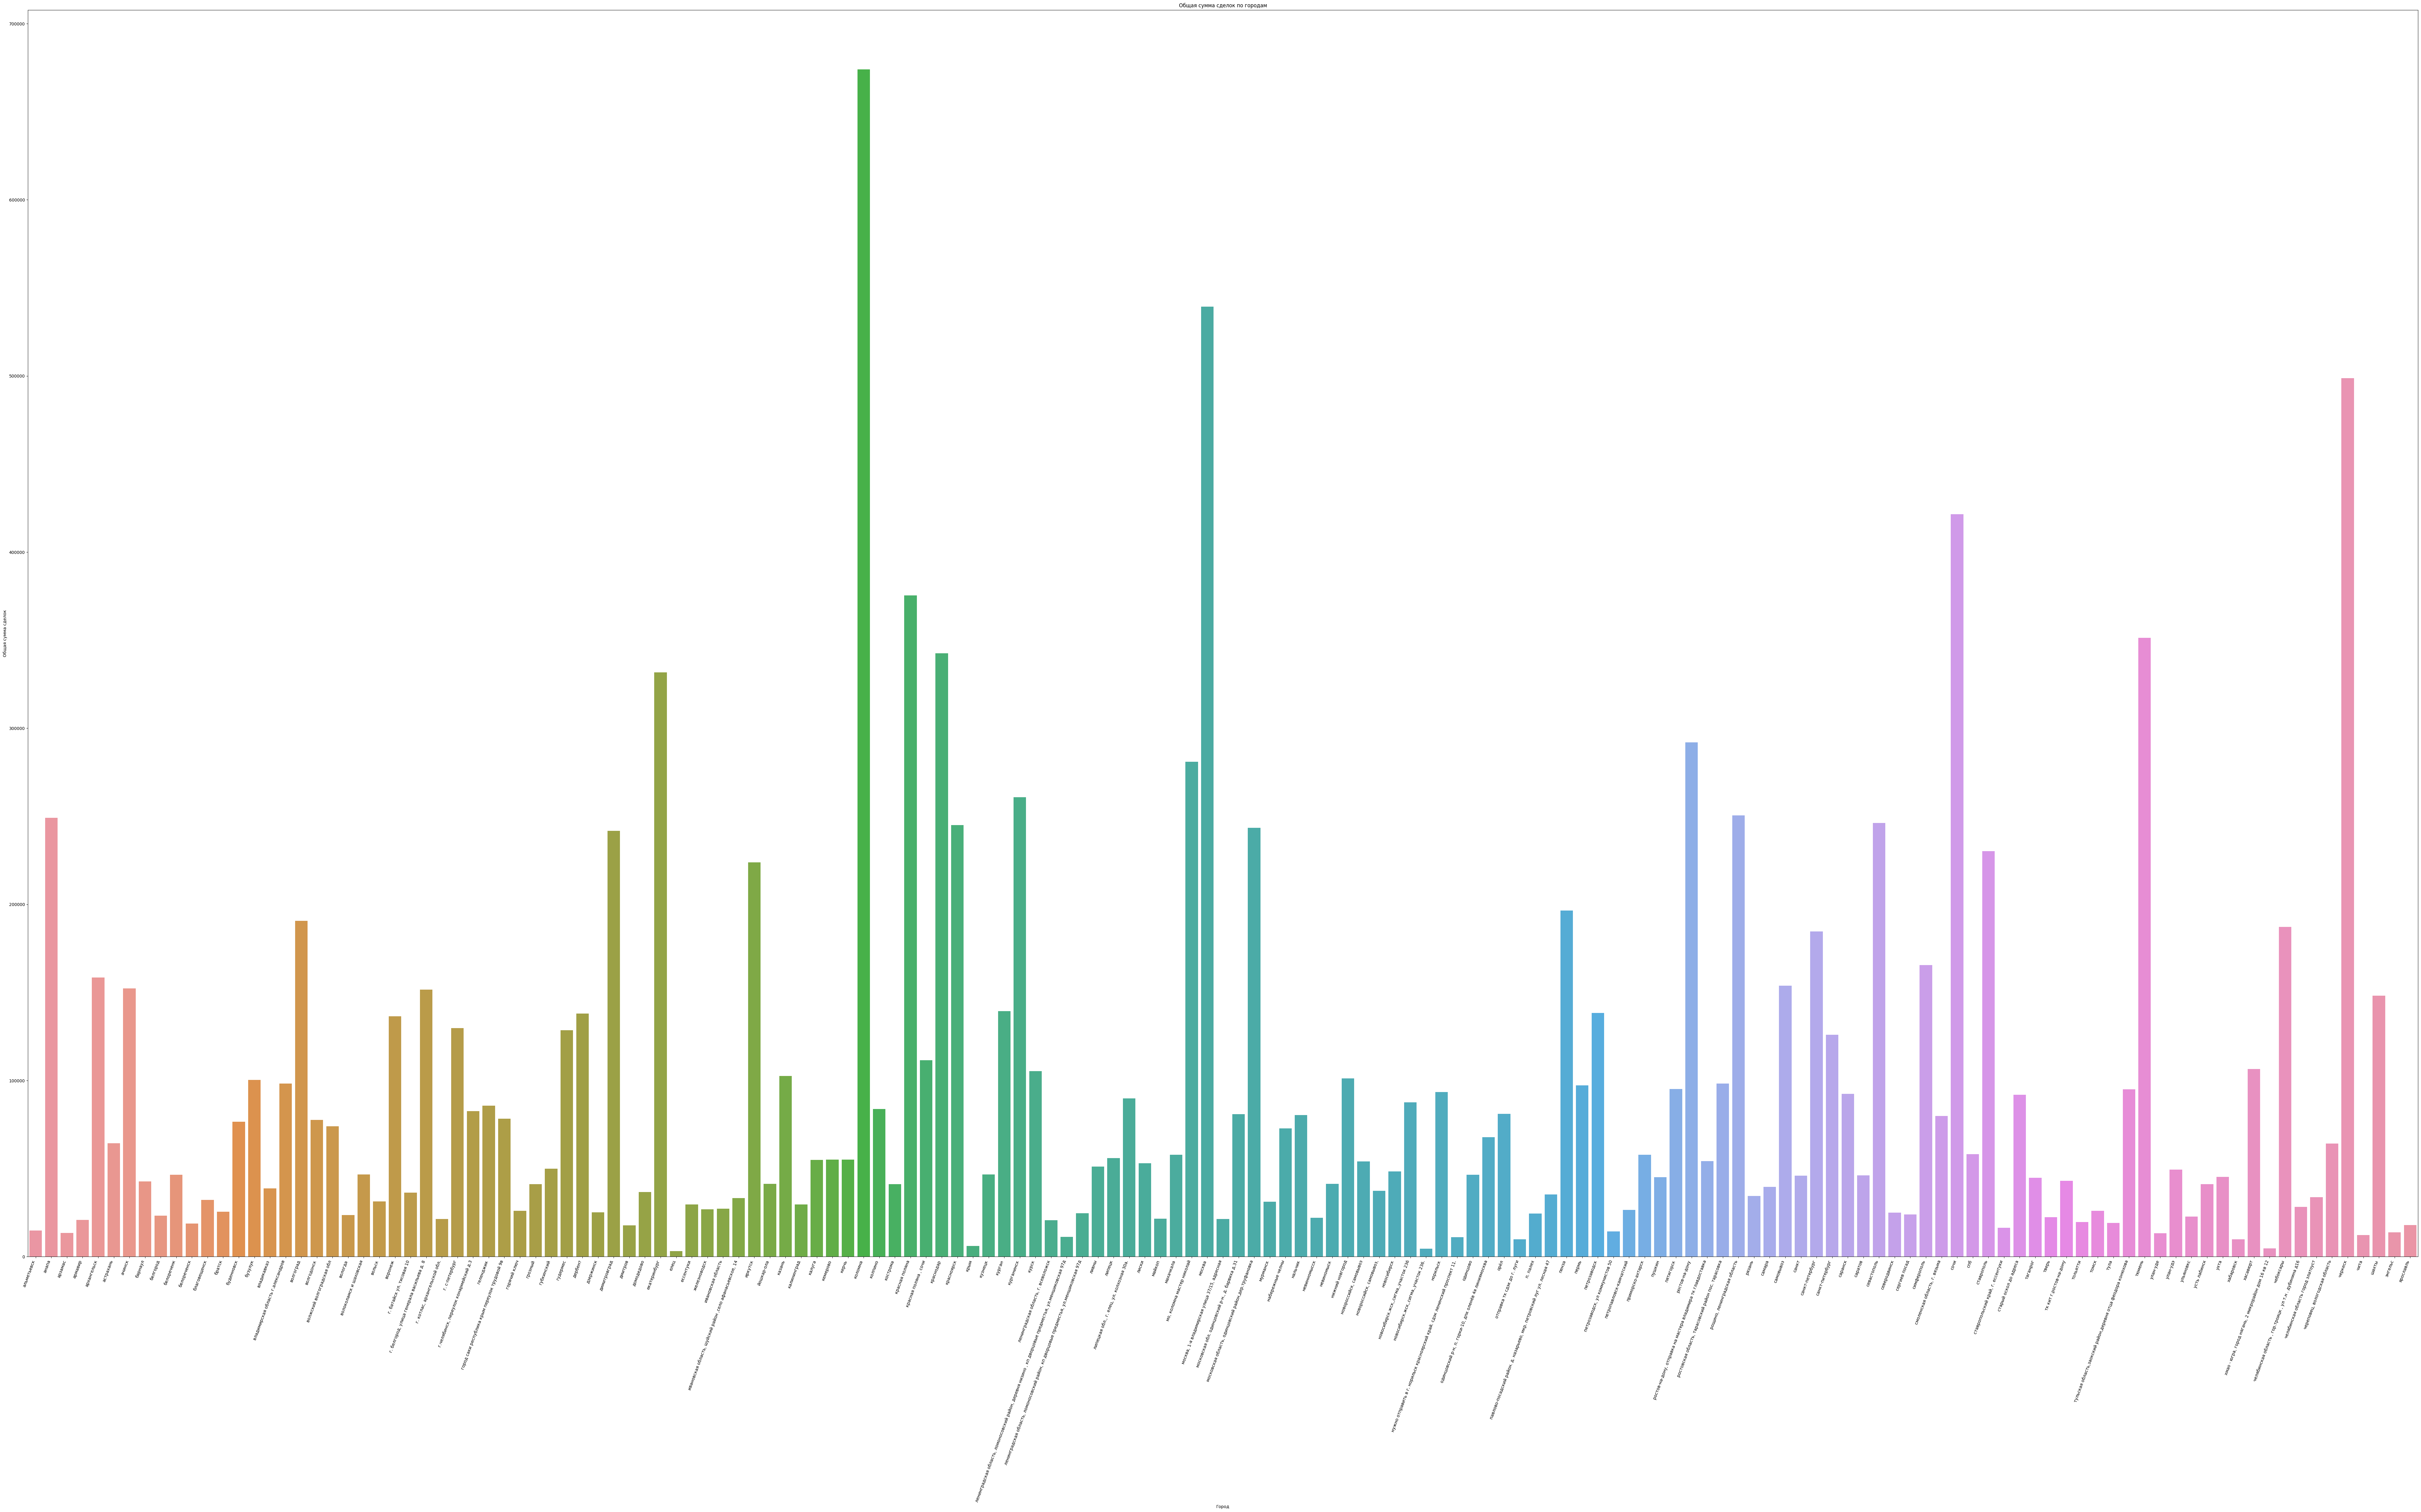

In [21]:
plt.figure(figsize=(80, 50))
sns.barplot(x="Город", y="Общая сумма сделок", data=city_time_metrics_df)
plt.xlabel("Город")
plt.ylabel("Общая сумма сделок")
plt.title("Общая сумма сделок по городам")
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.savefig("city_time_metrics_plot.png")
plt.show()

In [22]:
gabarit_metrics_df = df.groupby(["Товар"]).agg({
    "Сумма сделки": "sum",
    "Количество": "sum",
    "Цена": "mean"
}).reset_index()

In [23]:
gabarit_metrics_df

Товар  Сумма сделки  \
0                               40*300*1800 фаска лицо        4356.0   
1      Столешница 40*270*410 Бук цл. фаска по чертежу         1121.0   
2                                  Ступень 40*300*1200       37660.0   
3                 Ступень 40*300*1300  Цельноламельный        8745.0   
4                                      Щит 20*200*1150        9504.0   
...                                                ...           ...   
1773                          щит под заб 1 40*500*800        2540.0   
1774                      щит под заб 2,5  40*650*1400       13290.0   
1775                         щит под заб 3 40*550*1200        4191.0   
1776                          щит под заб 4 40*600*800        3048.0   
1777                         щит под заб 6 40*550*1200        4191.0   

      Количество    Цена  
0            1.0  4356.0  
1            1.0  1121.0  
2           14.0  2690.0  
3            3.0  2915.0  
4           11.0   864.0  
...          ...     ...  
1773         1.0  2540.0  
1774         2.0  6645.0  
1775         1.0  4191.0  
1776         1.0  3048.0  
1777         1.0  4191.0  

[1778 rows x 4 columns]

In [26]:
gabarit_metrics_df.dropna(subset=['Сумма сделки'], inplace=True)

In [27]:
gabarit_metrics_df

Товар  Сумма сделки  \
0                               40*300*1800 фаска лицо        4356.0   
1      Столешница 40*270*410 Бук цл. фаска по чертежу         1121.0   
2                                  Ступень 40*300*1200       37660.0   
3                 Ступень 40*300*1300  Цельноламельный        8745.0   
4                                      Щит 20*200*1150        9504.0   
...                                                ...           ...   
1773                          щит под заб 1 40*500*800        2540.0   
1774                      щит под заб 2,5  40*650*1400       13290.0   
1775                         щит под заб 3 40*550*1200        4191.0   
1776                          щит под заб 4 40*600*800        3048.0   
1777                         щит под заб 6 40*550*1200        4191.0   

      Количество    Цена  
0            1.0  4356.0  
1            1.0  1121.0  
2           14.0  2690.0  
3            3.0  2915.0  
4           11.0   864.0  
...          ...     ...  
1773         1.0  2540.0  
1774         2.0  6645.0  
1775         1.0  4191.0  
1776         1.0  3048.0  
1777         1.0  4191.0  

[1778 rows x 4 columns]

In [28]:
gabarit_metrics_df.to_excel("gabarit_metrics.xlsx", index=False)